In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
len(df.columns)

12

In [6]:
df = df.drop('PassengerId', axis=1)

In [7]:
len(df.columns)

11

In [8]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
df['Cabin'].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
D              3
E101           3
              ..
E38            1
C110           1
C118           1
A20            1
B41            1
Name: Cabin, Length: 147, dtype: int64

In [10]:
df = df.drop('Cabin', axis = 1)

In [11]:
len(df.columns)

10

In [12]:
df[df['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [13]:
df = df.dropna(axis = 0, subset=['Embarked'])

In [14]:
len(df)

889

In [15]:
df[df['Age'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...
859,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
868,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S
878,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S


In [16]:
df[df['Age'].isnull()]['Sex'].value_counts()

male      124
female     53
Name: Sex, dtype: int64

In [17]:
df.groupby('Sex').mean()['Age']

Sex
female    27.745174
male      30.726645
Name: Age, dtype: float64

In [18]:
df['Age'].mean()

29.64209269662921

In [19]:
df.groupby('Sex')['Age'].transform(lambda val: val.fillna(val.mean()))

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    27.745174
889    26.000000
890    32.000000
Name: Age, Length: 889, dtype: float64

In [20]:
df.groupby('Sex')['Age'].transform(lambda val: val.fillna(val.mean())).iloc[878:888]

880    25.000000
881    33.000000
882    22.000000
883    28.000000
884    25.000000
885    39.000000
886    27.000000
887    19.000000
888    27.745174
889    26.000000
Name: Age, dtype: float64

In [21]:
df['Age'] = df.groupby('Sex')['Age'].transform(lambda val: val.fillna(val.mean()))

In [22]:
df['Age'].isnull().sum()

0

In [23]:
df = df.drop(['Name', 'Ticket'], axis=1)

In [24]:
len(df.columns)

8

In [25]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [26]:
pd.get_dummies(df['Sex'], drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [27]:
pd.get_dummies(df['Embarked'], drop_first=True)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [28]:
pd.get_dummies(df['Pclass'], drop_first=True)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [29]:
df['Pclass'] = df['Pclass'].apply(str)

In [30]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [31]:
df_objs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pclass    889 non-null    object
 1   Sex       889 non-null    object
 2   Embarked  889 non-null    object
dtypes: object(3)
memory usage: 27.8+ KB


In [32]:
df_objs = pd.get_dummies(df_objs,drop_first=True)

In [33]:
final_df = pd.concat([df_nums,df_objs],axis=1)

In [34]:
final_df.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


In [35]:
df = final_df

<AxesSubplot:>

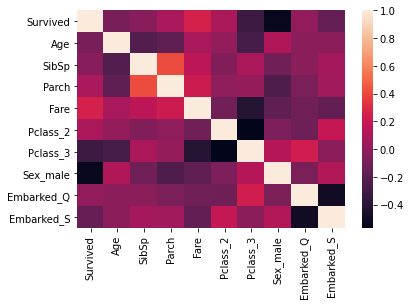

In [36]:
sns.heatmap(df.corr())


In [37]:
df.corr()['Survived'].sort_values()

Sex_male     -0.541585
Pclass_3     -0.320171
Embarked_S   -0.151777
Age          -0.085832
SibSp        -0.034040
Embarked_Q    0.004536
Parch         0.083151
Pclass_2      0.095002
Fare          0.255290
Survived      1.000000
Name: Survived, dtype: float64

In [38]:
df['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

/home/neelesh/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

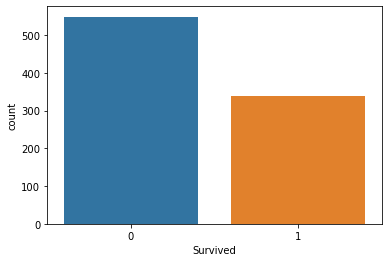

In [39]:
sns.countplot(df['Survived'])

<AxesSubplot:xlabel='Survived', ylabel='Age'>

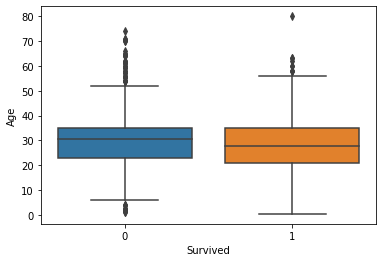

In [40]:
sns.boxplot(x='Survived', y='Age', data=df)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

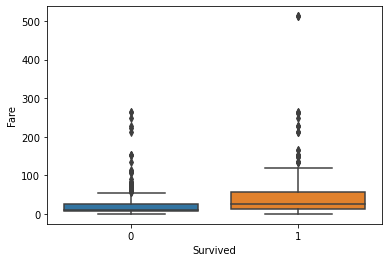

In [41]:
sns.boxplot(x='Survived', y='Fare', data=df)

<AxesSubplot:xlabel='Survived', ylabel='SibSp'>

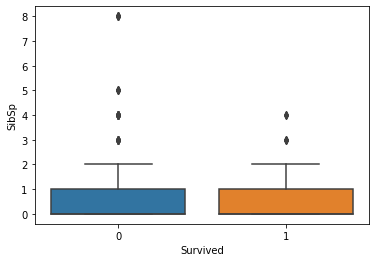

In [42]:
sns.boxplot(x='Survived', y='SibSp', data=df)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

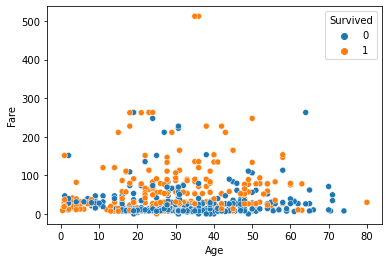

In [43]:
sns.scatterplot(x='Age', y='Fare', data=df, hue='Survived')

<AxesSubplot:>

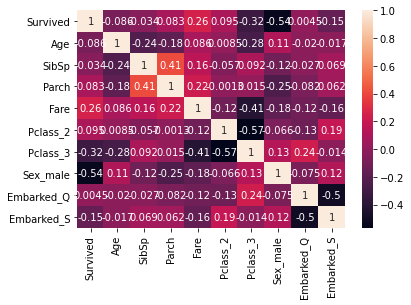

In [44]:
sns.heatmap(df.corr(),annot=True)

In [45]:
X = df.drop('Survived', axis = 1)
y = df['Survived']

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [48]:
scaler = StandardScaler()

In [49]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
log_model = LogisticRegression()

In [52]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [53]:
log_model.coef_

array([[-0.49779724, -0.3406407 , -0.09734215,  0.13634488, -0.35206164,
        -1.0345348 , -1.23650571,  0.04686465, -0.14847546]])

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [55]:
y_pred = log_model.predict(scaled_X_test)

In [56]:
accuracy_score(y_test, y_pred)

0.8426966292134831

In [57]:
confusion_matrix(y_test, y_pred)

array([[52,  5],
       [ 9, 23]])

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        57
           1       0.82      0.72      0.77        32

    accuracy                           0.84        89
   macro avg       0.84      0.82      0.82        89
weighted avg       0.84      0.84      0.84        89



In [59]:
from sklearn.model_selection import cross_val_score

In [60]:
score=cross_val_score(log_model,X,y)

/home/neelesh/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/neelesh/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

In [61]:
score

array([0.78089888, 0.80898876, 0.78651685, 0.76966292, 0.83615819])

In [62]:
score.mean()

0.7964451215641464

In [63]:
import joblib
joblib.dump(log_model,'Titanic_Survival.pkl')

['Titanic_Survival.pkl']